## Import libraries

In [310]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, Input, GlobalAveragePooling2D, Dropout, Conv2D, BatchNormalization, MaxPool2D, Flatten
from tensorflow.keras.layers.experimental.preprocessing import RandomZoom, RandomWidth, RandomRotation, RandomFlip, RandomHeight, Rescaling
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.models import load_model
import os, random

## Load dataset

In [12]:
dir_path = 'D:\Programming\Machine Learning\Datasets\Image classification datasets\Brain Tumor detection (MRI images)'

### Training set

In [13]:
train_path = os.path.join(dir_path, 'Training')

In [14]:
train_set = image_dataset_from_directory(
    directory = train_path,
    shuffle = True, 
    image_size = (224, 224),
    label_mode = 'categorical',
    batch_size = 32
)

Found 5712 files belonging to 4 classes.


### Test set

In [15]:
test_path = os.path.join(dir_path, 'Testing')

In [16]:
test_set = image_dataset_from_directory(
    directory = test_path,
    shuffle = False, 
    image_size = (224, 224),
    label_mode = 'categorical',
    batch_size = 32
)

Found 1311 files belonging to 4 classes.


In [17]:
labels = train_set.class_names
print(labels)

['glioma', 'meningioma', 'notumor', 'pituitary']


## Observing random images

In [18]:
def show_rand_img(from_dir = 'Training'):
    path_to_dir = os.path.join(dir_path, from_dir)
    rand_class = random.choice(os.listdir(path_to_dir))
    class_path = os.path.join(path_to_dir, rand_class)
    rand_img = random.choice(os.listdir(class_path))
    img_path = os.path.join(class_path, rand_img)

    img = img_to_array(load_img(img_path, target_size = (224, 224, 3)))
    img = img/255

    plt.style.use('dark_background')
    plt.figure(figsize=(3, 3))
    plt.imshow(img)
    plt.title(rand_class)
    plt.axis(False)

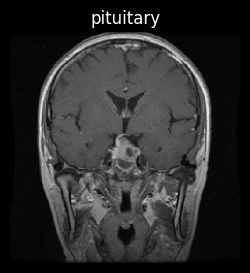

In [19]:
show_rand_img()

## Plot training curve function

In [142]:
def plot_train_curve(history_obj = None, epochs = None):
    plt.style.use('ggplot')

    fig = plt.figure(figsize = (10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(np.arange(0, epochs), history_obj.history['loss'], label = "train_loss")
    plt.plot(np.arange(0, epochs), history_obj.history['val_loss'], label = "test_loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2,)
    plt.plot(np.arange(0, epochs), history_obj.history['accuracy'], label = 'train_accuracy')
    plt.plot(np.arange(0, epochs), history_obj.history['val_accuracy'], label = 'test_accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


## Model 1 (`EfficientNetV2B0`)

In [17]:
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2B0

effnetv2_b0 = EfficientNetV2B0(include_top = False)
effnetv2_b0.trainable = False

24274472/24274472 [==============================] - 4s 0us/step


In [21]:
input = Input(shape = (224, 224, 3), name = 'input_layer')

data_aug = Sequential([
    RandomFlip('horizontal'),
    RandomHeight(0.2),
    RandomWidth(0.2),
    RandomRotation(0.2),
    RandomZoom(0.2)
], name = 'data_augmentation')

x = data_aug(input, training = True)
x = effnetv2_b0(x, training = False)
x = GlobalAveragePooling2D(name = 'global_avg_pool')(x)

output = Dense(units = len(labels), activation = 'softmax')(x)

model = Model(inputs = input, outputs = output)

In [ ]:
mobnet_v2.trainable = True

for layer in mobnet_v2.layers[:-10]:     # Last 10 layer unfreezed
    layer.trainable = False

In [22]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [23]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_avg_pool (GlobalAve  (None, 1280)              0         
 ragePooling2D)                                                  
                                                                 
 dense_1 (Dense)             (None, 4)                 5124      
                                                           

In [24]:
history_1 = model.fit(train_set, validation_data = test_set, epochs = 5)

Epoch 1/5
179/179 [==============================] - 140s 753ms/step - loss: 0.6897 - accuracy: 0.7528 - val_loss: 0.5948 - val_accuracy: 0.7757
Epoch 2/5
179/179 [==============================] - 138s 774ms/step - loss: 0.4423 - accuracy: 0.8528 - val_loss: 0.5059 - val_accuracy: 0.8116
Epoch 3/5
179/179 [==============================] - 143s 798ms/step - loss: 0.3818 - accuracy: 0.8727 - val_loss: 0.4771 - val_accuracy: 0.8185
Epoch 4/5
179/179 [==============================] - 143s 799ms/step - loss: 0.3519 - accuracy: 0.8801 - val_loss: 0.4584 - val_accuracy: 0.8162
Epoch 5/5
179/179 [==============================] - 129s 723ms/step - loss: 0.3299 - accuracy: 0.8820 - val_loss: 0.4021 - val_accuracy: 0.8528


### Training curve of Model 1

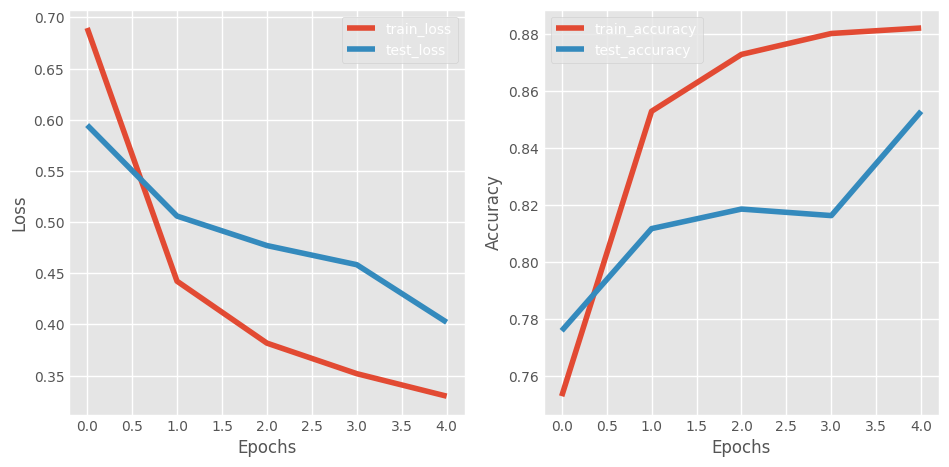

In [40]:
plt.style.use('ggplot')

fig = plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.plot(np.arange(0, 5), history_1.history['loss'], label = "train_loss")
plt.plot(np.arange(0, 5), history_1.history['val_loss'], label = "test_loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2,)
plt.plot(np.arange(0, 5), history_1.history['accuracy'], label = 'train_accuracy')
plt.plot(np.arange(0, 5), history_1.history['val_accuracy'], label = 'test_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


### Save the model 1

In [42]:
model.save('model_1.h5')

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [270]:
load_model('./model_1.h5').evaluate(test_set)

41/41 [==============================] - 28s 609ms/step - loss: 0.4077 - accuracy: 0.8505


[0.40767955780029297, 0.8504958152770996]

## Model 2 (`MobileNetV2 with fine tuning`)

In [10]:
model_ckpt = ModelCheckpoint(
    filepath = 'mobnet_v2_weights.ckpt',
    save_weights_only = True,
    verbose = 1,
    save_best_only = True
)

In [5]:
from keras.applications.mobilenet_v2 import MobileNetV2

mobnet_v2 = MobileNetV2(include_top = False, input_shape = (224, 224, 3))
mobnet_v2.trainable = False

In [22]:
input_layer = Input(shape = (224, 224, 3), name = 'input_layer')

data_aug = Sequential([
    RandomFlip('horizontal'),
    RandomWidth(0.2),
    RandomHeight(0.2),
    RandomRotation(0.2),
    RandomZoom(0.2),
    Rescaling(1/255.)
], name = 'data_augmentation')

x = data_aug(input_layer, training = True)
x = mobnet_v2(x)
x = GlobalAveragePooling2D(name = 'global_avg_pool2D')(x)
x = Dense(units = 256, activation = 'relu', name = 'dense_after_avg_pool')(x)
x = Dropout(rate = 0.5, name = 'dropout_output')(x)

output_layer = Dense(units = len(labels), activation = 'softmax')(x)

model_2 = Model(inputs = input_layer, outputs = output_layer)


In [23]:
model_2.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [24]:
model_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_avg_pool2D (GlobalA  (None, 1280)              0         
 veragePooling2D)                                                
                                                                 
 dense_after_avg_pool (Dens  (None, 256)               327936    
 e)                                                          

In [25]:
history_mobnet_v2 = model_2.fit(train_set, validation_data = test_set, epochs = 10, callbacks = [model_ckpt])

Epoch 1/10
179/179 [==============================] - ETA: 0s - loss: 0.5926 - accuracy: 0.7771
Epoch 1: val_loss improved from inf to 0.46412, saving model to mobnet_v2_weights.ckpt
179/179 [==============================] - 111s 596ms/step - loss: 0.5926 - accuracy: 0.7771 - val_loss: 0.4641 - val_accuracy: 0.8200
Epoch 2/10
179/179 [==============================] - ETA: 0s - loss: 0.4253 - accuracy: 0.8403
Epoch 2: val_loss improved from 0.46412 to 0.41699, saving model to mobnet_v2_weights.ckpt
179/179 [==============================] - 99s 554ms/step - loss: 0.4253 - accuracy: 0.8403 - val_loss: 0.4170 - val_accuracy: 0.8337
Epoch 3/10
179/179 [==============================] - ETA: 0s - loss: 0.3882 - accuracy: 0.8531
Epoch 3: val_loss improved from 0.41699 to 0.39500, saving model to mobnet_v2_weights.ckpt
179/179 [==============================] - 100s 561ms/step - loss: 0.3882 - accuracy: 0.8531 - val_loss: 0.3950 - val_accuracy: 0.8528
Epoch 4/10
179/179 [===================

### Plot training curve

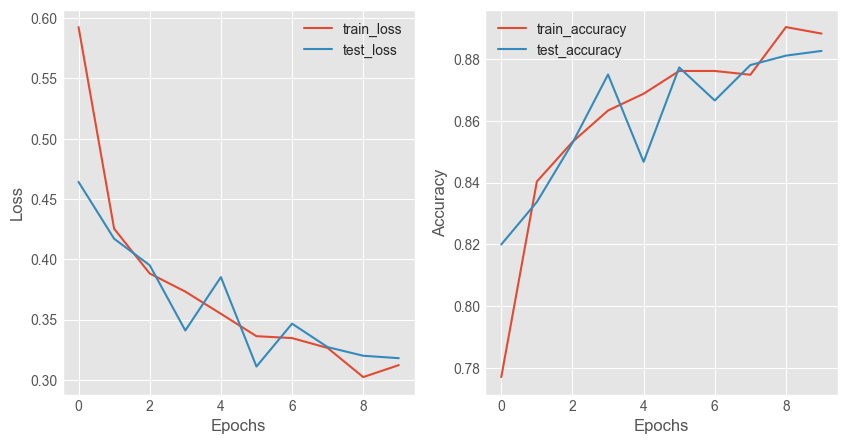

In [36]:
plt.style.use('ggplot')

fig = plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.plot(np.arange(0, 10), history_mobnet_v2.history['loss'], label = "train_loss")
plt.plot(np.arange(0, 10), history_mobnet_v2.history['val_loss'], label = "test_loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2,)
plt.plot(np.arange(0, 10), history_mobnet_v2.history['accuracy'], label = 'train_accuracy')
plt.plot(np.arange(0, 10), history_mobnet_v2.history['val_accuracy'], label = 'test_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [37]:
model_2.save('mobnet_v2.h5')

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Fine tuning

In [81]:
lr_scheduler = LearningRateScheduler(lambda epoch : 0.00005 * (10 ** -(epoch / 10)))

In [82]:
saved_model_ckpt = ModelCheckpoint(
    filepath = 'mobnet_v2_tuned.h5',
    save_best_only = True,
    monitor = 'val_accuracy',
    verbose = 1
)

In [83]:
mobnet_v2.trainable = True

for layer in mobnet_v2.layers[:-10]:     # Last 10 layer unfreezed
    layer.trainable = False

In [91]:
model_2.load_weights('mobnet_v2_weights.ckpt')    # Load the saved weights

In [93]:
model_2.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.00005),
    metrics = ['accuracy']
)

In [95]:
model_2.evaluate(test_set)

41/41 [==============================] - 17s 385ms/step - loss: 0.3302 - accuracy: 0.8741


[0.33019185066223145, 0.8741418719291687]

In [96]:
history_mobnet_v2_tuned = model_2.fit(
    train_set,
    validation_data = test_set,
    callbacks = [lr_scheduler, saved_model_ckpt],
    initial_epoch = history_mobnet_v2.epoch[-1],     # Start from the last epoch of the feature extractor model
    epochs = history_mobnet_v2.epoch[-1] + 15    # Add more 15 epochs   
)

Epoch 10/24


179/179 [==============================] - ETA: 0s - loss: 0.5507 - accuracy: 0.7999
Epoch 10: val_accuracy improved from -inf to 0.84821, saving model to mobnet_v2_tuned.h5
179/179 [==============================] - 102s 554ms/step - loss: 0.5507 - accuracy: 0.7999 - val_loss: 0.3762 - val_accuracy: 0.8482 - lr: 6.2946e-06
Epoch 11/24


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


179/179 [==============================] - ETA: 0s - loss: 0.4561 - accuracy: 0.8297
Epoch 11: val_accuracy improved from 0.84821 to 0.85584, saving model to mobnet_v2_tuned.h5
179/179 [==============================] - 101s 564ms/step - loss: 0.4561 - accuracy: 0.8297 - val_loss: 0.4215 - val_accuracy: 0.8558 - lr: 5.0000e-06
Epoch 12/24
179/179 [==============================] - ETA: 0s - loss: 0.4182 - accuracy: 0.8437
Epoch 12: val_accuracy improved from 0.85584 to 0.86194, saving model to mobnet_v2_tuned.h5
179/179 [==============================] - 102s 572ms/step - loss: 0.4182 - accuracy: 0.8437 - val_loss: 0.3760 - val_accuracy: 0.8619 - lr: 3.9716e-06
Epoch 13/24
179/179 [==============================] - ETA: 0s - loss: 0.3998 - accuracy: 0.8519
Epoch 13: val_accuracy improved from 0.86194 to 0.87185, saving model to mobnet_v2_tuned.h5
179/179 [==============================] - 102s 568ms/step - loss: 0.3998 - accuracy: 0.8519 - val_loss: 0.3853 - val_accuracy: 0.8719 - lr: 

### Training curve after fine-tuning the `mobnet_v2` model

In [101]:
total_train_loss = history_mobnet_v2.history['loss'] + history_mobnet_v2_tuned.history['loss']
total_val_loss = history_mobnet_v2.history['val_loss'] + history_mobnet_v2_tuned.history['val_loss']

total_train__accuracy = history_mobnet_v2.history['accuracy'] + history_mobnet_v2_tuned.history['accuracy']
total_val_accuracy = history_mobnet_v2.history['val_accuracy'] + history_mobnet_v2_tuned.history['val_accuracy']
total_epochs = 24

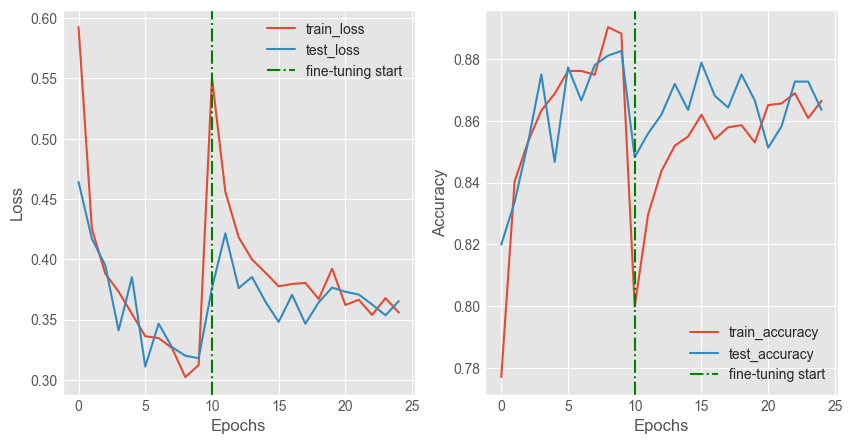

In [117]:
fig = plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
plt.plot(np.arange(0, 25), total_train_loss, label = "train_loss")
plt.plot(np.arange(0, 25), total_val_loss, label = "test_loss")
plt.axvline(x = 10, color = 'g', linestyle = '-.', label = 'fine-tuning start')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.arange(0, 25), total_train__accuracy, label = 'train_accuracy')
plt.plot(np.arange(0, 25), total_val_accuracy, label = 'test_accuracy')
plt.axvline(x = 10, ymin = 0, ymax = 1, color = 'g', linestyle = '-.', label = 'fine-tuning start')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


> `Fine-tuning` has not improved the model that much (but, after fine tuning, the `val_loss` is lower than the `train_loss` and `val_accuracy` is higher than the `train_loss`)

### Exploring it's accuracy

In [119]:
mobnetv2_tuned = load_model('./mobnet_v2_tuned.h5')

In [121]:
mobnetv2_tuned.evaluate(test_set)

41/41 [==============================] - 15s 378ms/step - loss: 0.3433 - accuracy: 0.8741


[0.34334132075309753, 0.8741418719291687]

## Model 3 (`Inception V3`)

In [124]:
from keras.applications.inception_v3 import InceptionV3

inception_v3 = InceptionV3(include_top = False)
inception_v3.trainable = False

In [129]:
len(inception_v3.layers)

311

In [137]:
model_inception_ckpt = ModelCheckpoint(
    filepath = 'inception_v3.h5',
    save_best_only = True,
    monitor = 'val_accuracy',
    verbose = 1
)

In [138]:
input_layer = Input(shape = (224, 224, 3), name = 'input_layer')

data_aug = Sequential([
    Rescaling(1/255.),
    RandomHeight(0.2),
    RandomWidth(0.2),
    RandomZoom(0.2),
    RandomRotation(0.2)
], name = 'data_augmentation')

x = data_aug(input_layer, training = True)
x = inception_v3(x)
x = GlobalAveragePooling2D(name = 'global_avg_pool')(x)
x = Dense(units = 256, activation = 'relu')(x)
x = Dropout(rate = 0.3)(x)
x = Dense(units = 128, activation = 'relu')(x)

output_layer = Dense(units = len(labels), activation = 'softmax')(x)

model_3 = Model(inputs = input_layer, outputs = output_layer)

In [139]:
model_3.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(0.002),
    metrics = ['accuracy']
)

In [140]:
model_3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequent  (None, None, None, 3)     0         
 ial)                                                            
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048   21802784  
                             )                                   
                                                                 
 global_avg_pool (GlobalAve  (None, 2048)              0         
 ragePooling2D)                                                  
                                                                 
 dense_7 (Dense)             (None, 256)               524544    
                                                           

In [141]:
history_inception_v3 = model_3.fit(
    train_set,
    validation_data = test_set,
    epochs = 10,
    callbacks = [model_inception_ckpt]
)

Epoch 1/10


179/179 [==============================] - ETA: 0s - loss: 0.9337 - accuracy: 0.6450
Epoch 1: val_accuracy improved from -inf to 0.70633, saving model to inception_v3.h5


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


179/179 [==============================] - 149s 815ms/step - loss: 0.9337 - accuracy: 0.6450 - val_loss: 0.7233 - val_accuracy: 0.7063
Epoch 2/10
179/179 [==============================] - ETA: 0s - loss: 0.6105 - accuracy: 0.7659
Epoch 2: val_accuracy improved from 0.70633 to 0.77498, saving model to inception_v3.h5
179/179 [==============================] - 156s 870ms/step - loss: 0.6105 - accuracy: 0.7659 - val_loss: 0.5757 - val_accuracy: 0.7750
Epoch 3/10
179/179 [==============================] - ETA: 0s - loss: 0.5655 - accuracy: 0.7885
Epoch 3: val_accuracy improved from 0.77498 to 0.77651, saving model to inception_v3.h5
179/179 [==============================] - 166s 926ms/step - loss: 0.5655 - accuracy: 0.7885 - val_loss: 0.5887 - val_accuracy: 0.7765
Epoch 4/10
179/179 [==============================] - ETA: 0s - loss: 0.5350 - accuracy: 0.8022
Epoch 4: val_accuracy improved from 0.77651 to 0.79100, saving model to inception_v3.h5
179/179 [==============================] - 

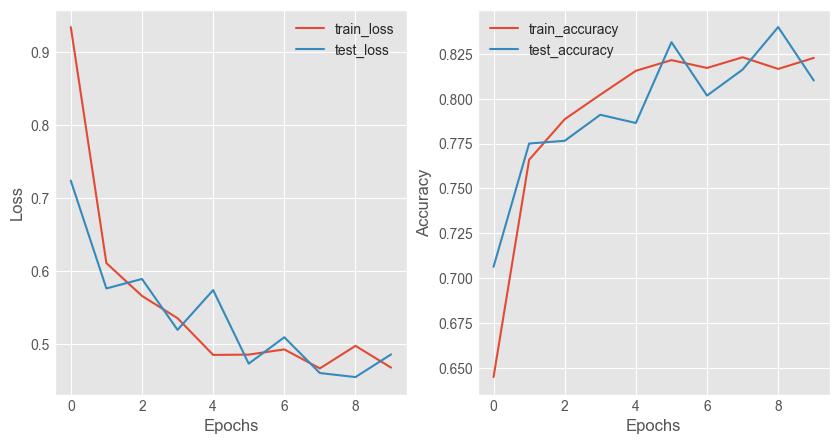

In [143]:
plot_train_curve(history_inception_v3, 10)

In [144]:
inception_v3_model = load_model('./inception_v3.h5')

inception_v3_model.evaluate(test_set)

41/41 [==============================] - 29s 670ms/step - loss: 0.4826 - accuracy: 0.8192


[0.4826146066188812, 0.8192219734191895]

## Model 4 (`ResNet 50`)

In [148]:
model_inception_ckpt = ModelCheckpoint(
    filepath = 'resnet_v2_50.h5',
    save_best_only = True,
    monitor = 'val_accuracy',
    verbose = 1
)

In [149]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2

resnet_50_v2 = ResNet50V2(include_top = False)
resnet_50_v2.trainable = False

In [150]:
len(resnet_50_v2.layers)

190

In [152]:
input_layer = Input(shape = (224, 224, 3), name = 'input_layer')

data_aug = Sequential([
    Rescaling(1/255.),
    RandomHeight(0.2),
    RandomWidth(0.2),
    RandomZoom(0.2),
    RandomRotation(0.2)
], name = 'data_augmentation')

x = data_aug(input_layer, training = True)
x = resnet_50_v2(x)
x = GlobalAveragePooling2D(name = 'global_avg_pool')(x)

output_layer = Dense(units = len(labels), activation = 'softmax')(x)

model_4 = Model(inputs = input_layer, outputs = output_layer)

In [154]:
model_4.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0015),
    metrics = ['accuracy']
)

In [155]:
history_resnet_v2 = model_4.fit(
    train_set,
    validation_data = test_set,
    epochs = 10,
    callbacks = [model_inception_ckpt]
)

Epoch 1/10
179/179 [==============================] - ETA: 0s - loss: 0.5822 - accuracy: 0.7766
Epoch 1: val_accuracy improved from -inf to 0.78566, saving model to resnet_v2_50.h5


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


179/179 [==============================] - 248s 1s/step - loss: 0.5822 - accuracy: 0.7766 - val_loss: 0.5950 - val_accuracy: 0.7857
Epoch 2/10
179/179 [==============================] - ETA: 0s - loss: 0.3792 - accuracy: 0.8612
Epoch 2: val_accuracy improved from 0.78566 to 0.82914, saving model to resnet_v2_50.h5
179/179 [==============================] - 253s 1s/step - loss: 0.3792 - accuracy: 0.8612 - val_loss: 0.4355 - val_accuracy: 0.8291
Epoch 3/10
179/179 [==============================] - ETA: 0s - loss: 0.3437 - accuracy: 0.8696
Epoch 3: val_accuracy improved from 0.82914 to 0.86728, saving model to resnet_v2_50.h5
179/179 [==============================] - 252s 1s/step - loss: 0.3437 - accuracy: 0.8696 - val_loss: 0.3890 - val_accuracy: 0.8673
Epoch 4/10
179/179 [==============================] - ETA: 0s - loss: 0.3092 - accuracy: 0.8878
Epoch 4: val_accuracy did not improve from 0.86728
179/179 [==============================] - 256s 1s/step - loss: 0.3092 - accuracy: 0.8878

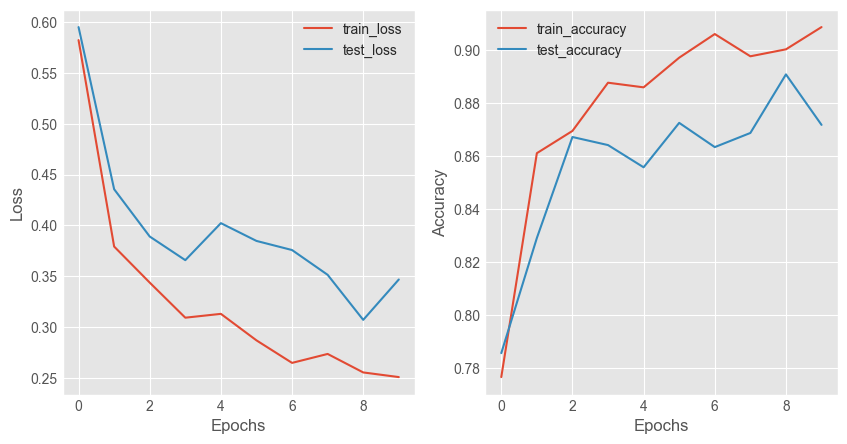

In [156]:
plot_train_curve(history_resnet_v2, 10)

In [158]:
resnet_50_v2_loaded = load_model('./resnet_v2_50.h5')

resnet_50_v2_loaded.evaluate(test_set)

41/41 [==============================] - 47s 1s/step - loss: 0.3351 - accuracy: 0.8749


[0.3350502848625183, 0.8749046325683594]

## Model 5 (`Custom CNN model`)

In [236]:
model_cnn_ckpt = ModelCheckpoint(
    filepath = 'custom_cnn.h5',
    save_best_only = True,
    monitor = 'val_accuracy',
    verbose = 1
)

In [238]:
input = Input(shape = (224, 224, 3), name = 'input_layer')

data_aug = Sequential([
    Rescaling(1/255.),
    RandomHeight(0.2),
    RandomWidth(0.2),
    RandomZoom(0.2),
    RandomRotation(0.2)
], name = 'data_aug')

x = data_aug(input, training = True)

x = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'valid', activation = 'relu', name = 'conv1')(x)
x = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv2')(x)
x = BatchNormalization(name = 'batch_norm1')(x)
x = MaxPool2D(pool_size = (2, 2), strides = (1, 1), padding = 'valid', name = 'max_pool_1')(x)

x = Conv2D(filters = 32, kernel_size = (3, 3), padding = 'valid', activation = 'relu', name = 'conv3')(x)
x = Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', activation = 'relu', name = 'conv4')(x)
x = BatchNormalization(name = 'batch_norm2')(x)
x = MaxPool2D(pool_size = (2, 2), strides = (1, 1), padding = 'valid', name = 'max_pool_2')(x)

x = GlobalAveragePooling2D(name = 'global_avg_pool')(x)

output = Dense(units = len(labels), activation = 'softmax', name = 'output_layer')(x)

model_5 = Model(inputs = input, outputs = output)

In [239]:
model_5.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [240]:
model_5.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_aug (Sequential)       (None, None, None, 3)     0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    896       
                                                                 
 conv2 (Conv2D)              (None, None, None, 32)    9248      
                                                                 
 batch_norm1 (BatchNormaliz  (None, None, None, 32)    128       
 ation)                                                          
                                                                 
 max_pool_1 (MaxPooling2D)   (None, None, None, 32)    0         
                                                          

In [241]:
history_custom_cnn = model_5.fit(
    train_set,
    validation_data = test_set,
    epochs = 5,
    callbacks = [model_cnn_ckpt]
)

Epoch 1/5


179/179 [==============================] - ETA: 0s - loss: 0.9813 - accuracy: 0.6154
Epoch 1: val_accuracy improved from -inf to 0.45233, saving model to custom_cnn.h5
179/179 [==============================] - 542s 3s/step - loss: 0.9813 - accuracy: 0.6154 - val_loss: 1.6594 - val_accuracy: 0.4523
Epoch 2/5


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


179/179 [==============================] - ETA: 0s - loss: 0.8211 - accuracy: 0.6907
Epoch 2: val_accuracy did not improve from 0.45233
179/179 [==============================] - 545s 3s/step - loss: 0.8211 - accuracy: 0.6907 - val_loss: 1.4796 - val_accuracy: 0.4477
Epoch 3/5
179/179 [==============================] - ETA: 0s - loss: 0.7574 - accuracy: 0.7150
Epoch 3: val_accuracy improved from 0.45233 to 0.57971, saving model to custom_cnn.h5
179/179 [==============================] - 541s 3s/step - loss: 0.7574 - accuracy: 0.7150 - val_loss: 1.0072 - val_accuracy: 0.5797
Epoch 4/5
179/179 [==============================] - ETA: 0s - loss: 0.7261 - accuracy: 0.7237
Epoch 4: val_accuracy did not improve from 0.57971
179/179 [==============================] - 537s 3s/step - loss: 0.7261 - accuracy: 0.7237 - val_loss: 1.0445 - val_accuracy: 0.5789
Epoch 5/5
179/179 [==============================] - ETA: 0s - loss: 0.7023 - accuracy: 0.7264
Epoch 5: val_accuracy improved from 0.57971 to

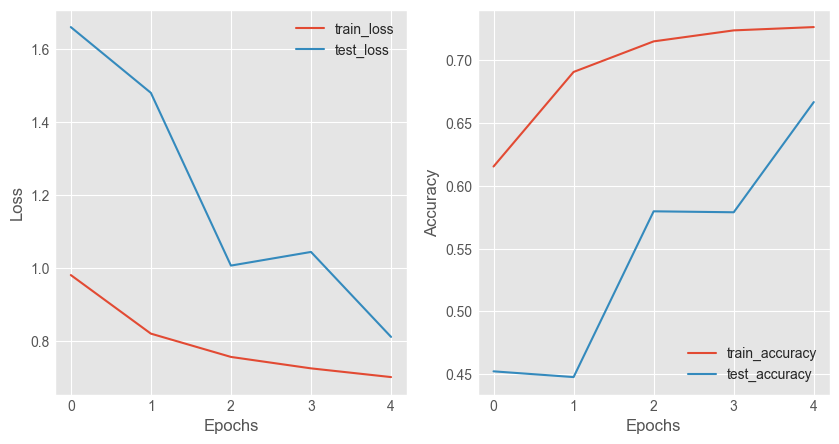

In [242]:
plot_train_curve(history_custom_cnn, 5)

## Model 6 (`EfficientNetV2B1 with fine tuning`)

In [256]:
model_effnetv2b1_ckpt = ModelCheckpoint(
    filepath = 'effnet_v2_b1.h5',
    save_best_only = True,
    monitor = 'val_accuracy',
    verbose = 1
)

In [258]:
from keras.applications.efficientnet_v2 import EfficientNetV2B1

effnetv2_b1 = EfficientNetV2B1(include_top = False)
effnetv2_b1.trainable = True

In [259]:
for layer in effnetv2_b1.layers[:-10]:
    layer.trainable = False

In [262]:
len(effnetv2_b1.trainable_variables)

10

In [263]:
input = Input(shape = (224, 224, 3), name = 'input_layer')

data_aug = Sequential([
    RandomFlip('horizontal'),
    RandomHeight(0.2),
    RandomWidth(0.2),
    RandomRotation(0.2),
    RandomZoom(0.2)
], name = 'data_augmentation')

x = data_aug(input, training = True)
x = effnetv2_b1(x, training = False)
x = GlobalAveragePooling2D(name = 'global_avg_pool')(x)

output = Dense(units = len(labels), activation = 'softmax')(x)

model_6 = Model(inputs = input, outputs = output)

In [264]:
model_6.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [265]:
history_effnetv2_b1 = model_6.fit(
    train_set,
    validation_data = test_set,
    epochs = 15,
    callbacks = [model_effnetv2b1_ckpt]
)

Epoch 1/15


179/179 [==============================] - ETA: 0s - loss: 0.4758 - accuracy: 0.8192
Epoch 1: val_accuracy improved from -inf to 0.84439, saving model to effnet_v2_b1.h5


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


179/179 [==============================] - 185s 976ms/step - loss: 0.4758 - accuracy: 0.8192 - val_loss: 0.4052 - val_accuracy: 0.8444
Epoch 2/15
179/179 [==============================] - ETA: 0s - loss: 0.2962 - accuracy: 0.8876
Epoch 2: val_accuracy improved from 0.84439 to 0.86117, saving model to effnet_v2_b1.h5
179/179 [==============================] - 175s 975ms/step - loss: 0.2962 - accuracy: 0.8876 - val_loss: 0.3959 - val_accuracy: 0.8612
Epoch 3/15
179/179 [==============================] - ETA: 0s - loss: 0.2381 - accuracy: 0.9119
Epoch 3: val_accuracy improved from 0.86117 to 0.89092, saving model to effnet_v2_b1.h5
179/179 [==============================] - 227s 1s/step - loss: 0.2381 - accuracy: 0.9119 - val_loss: 0.2819 - val_accuracy: 0.8909
Epoch 4/15
179/179 [==============================] - ETA: 0s - loss: 0.2041 - accuracy: 0.9287
Epoch 4: val_accuracy improved from 0.89092 to 0.92525, saving model to effnet_v2_b1.h5
179/179 [==============================] - 228

### Training curve

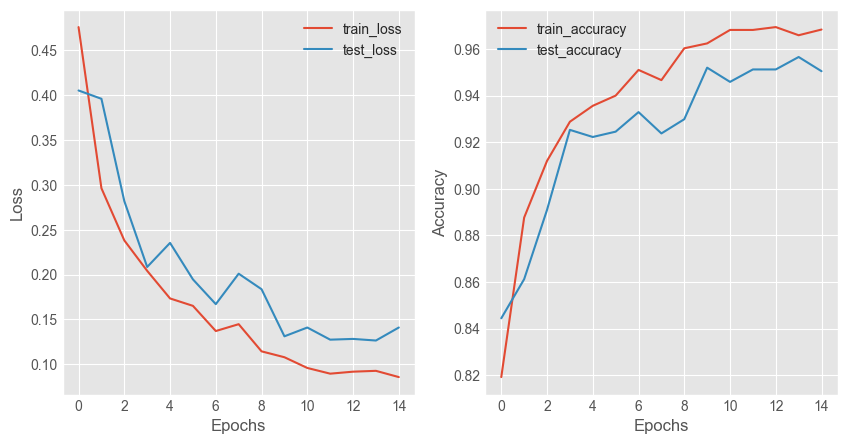

In [266]:
plot_train_curve(history_effnetv2_b1, 15)

### Evaluation

In [267]:
model_6.evaluate(test_set)

41/41 [==============================] - 31s 753ms/step - loss: 0.1219 - accuracy: 0.9573


[0.12185757607221603, 0.9572845101356506]

In [269]:
loaded_model_6 = load_model('./effnet_v2_b1.h5')
loaded_model_6.evaluate(test_set)

41/41 [==============================] - 36s 809ms/step - loss: 0.1382 - accuracy: 0.9588


[0.13815714418888092, 0.9588100910186768]

## **Models summary :**
- Model 1 (`EfficientNetV2B0`) accuracy : `~85%`
- Model 2 (`MobileNetV2 (fine-tuned)`) accuracy : `~87.4%`
- Model 3 (`InceptionV3`) accuracy : `~82%`
- Model 4 (`ResNetV250`) accuracy : `~87.5%`
- Model 5 (`Custom CNN`) accuracy : `~66.7%`
- **Model 6 (`EfficientNetV2B1 (fine-tuned)`) accuracy : `~96%`**

## In-depth evaluation of Model 6

In [306]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, classification_report, f1_score

In [291]:
y_test = []

for img, label in test_set.unbatch():
    label = label.numpy()
    y_test.append(np.argmax(label))
y_test[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [290]:
y_pred = loaded_model_6.predict(test_set)
y_pred = np.argmax(y_pred, axis = 1)
y_pred[:10]

41/41 [==============================] - 28s 644ms/step


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

### `Accuracy score`

In [293]:
print(f"Accuracy score : {accuracy_score(y_test, y_pred):.3f}")

Accuracy score : 0.954


### `Recall score`

**How weighted average is calculated : `(300/1311) * (0.89) + (306/1311) * (0.93) + (405/1311) + (300/1311) * (0.98)`**

In [299]:
print(f"Recall score : {recall_score(y_test, y_pred, average = 'weighted'):.3f}")

Recall score : 0.954


### `Precision score`

In [300]:
print(f"Precision score : {precision_score(y_test, y_pred, average = 'weighted'):.3f}")

Precision score : 0.955


### `F1 score`

In [307]:
print(f"F1 score : {f1_score(y_test, y_pred, average = 'weighted'):.3f}")

F1 score : 0.954


### `Classification report`

- `0` : `giloma`
- `1` : `meningioma`
- `2` : `notumor`
- `3` : `pituitary`

In [303]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       300
           1       0.90      0.93      0.91       306
           2       0.96      1.00      0.98       405
           3       0.99      0.98      0.99       300

    accuracy                           0.95      1311
   macro avg       0.96      0.95      0.95      1311
weighted avg       0.96      0.95      0.95      1311



### `Confusion Matrix`

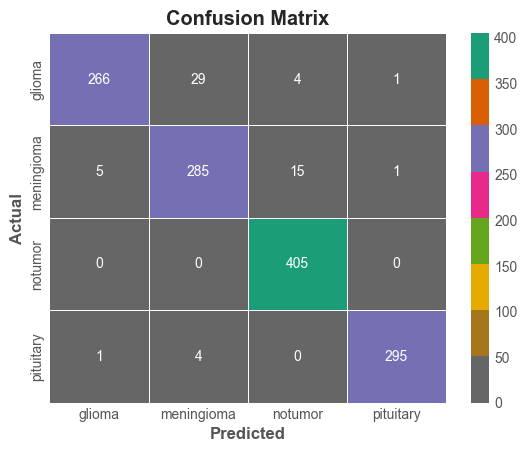

In [330]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap = 'Dark2_r', annot = True, fmt = 'd', linewidths = 0.5)
plt.xticks((0.5, 1.5, 2.5, 3.5), labels)
plt.yticks((0.5, 1.5, 2.5, 3.5), labels)
plt.xlabel("Predicted", fontweight = 'bold')
plt.ylabel("Actual", fontweight = 'bold')

plt.title('Confusion Matrix', fontweight = 'bold');

## `Predict random images`

In [355]:
def predict_rand_img(model,from_dir = 'Testing', labels = labels):
    """
    Predict random images from the specified data set.

    Args:
    -----
    * model : The estimator
    * from_dir : Train or Test dir, default = Test
    * labels : Actual class labels
    
    """
    path_to_dir = os.path.join(dir_path, from_dir)
    rand_class = random.choice(os.listdir(path_to_dir))
    class_path = os.path.join(path_to_dir, rand_class)
    rand_img = random.choice(os.listdir(class_path))
    img_path = os.path.join(class_path, rand_img)

    img = img_to_array(load_img(img_path, target_size = (224, 224, 3)))
    img = np.expand_dims(img, axis = 0)
    pred_class_ind = np.argmax(model.predict(img, verbose = 0), axis = 1)
    pred_class = labels[int(pred_class_ind)]
    plt.style.use('dark_background')
    plt.figure(figsize=(3, 3))
    plt.imshow(np.squeeze(img)/255)

    if(pred_class == rand_class):
        plt.title(f"Actual : {rand_class}\nPredicted : {pred_class}", color = 'green', fontweight = 'bold')
    else:
        plt.title(f"Actual : {rand_class}\nPredicted : {pred_class}", color = 'red', fontweight = 'bold')
        
    plt.axis(False)

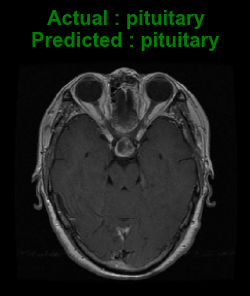

In [359]:
predict_rand_img(model = loaded_model_6)